In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Implementing basic model

In [3]:
## Get A function

def get_A(opinions,R):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions
    '''
    
    num_of_agents = len(opinions)

    # Create a square matrix consisting of the opinions vector repeated num_of_agents times
    opinions_repeated = np.array([opinions]*len(opinions))
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = abs(opinions_repeated - opinions_repeated.T) < R
    
    # Initialise averages matrix
    A = np.zeros(num_of_agents)

    # Loop over agents
    for i in range(num_of_agents):
        # Get average of opinions within R of opinion
        A[i] = np.mean(opinions[mask[i,:]])
        # print(A[i])
    
    return(A)

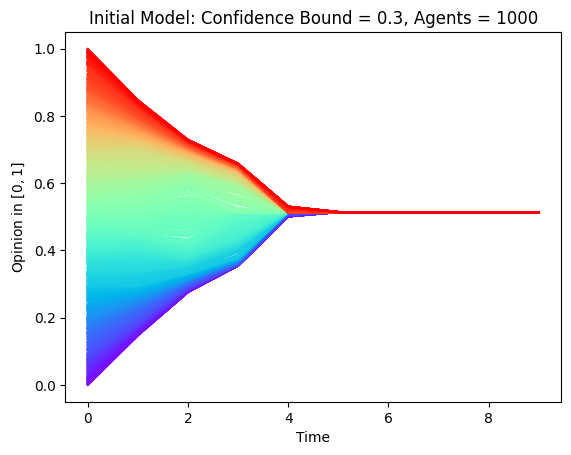

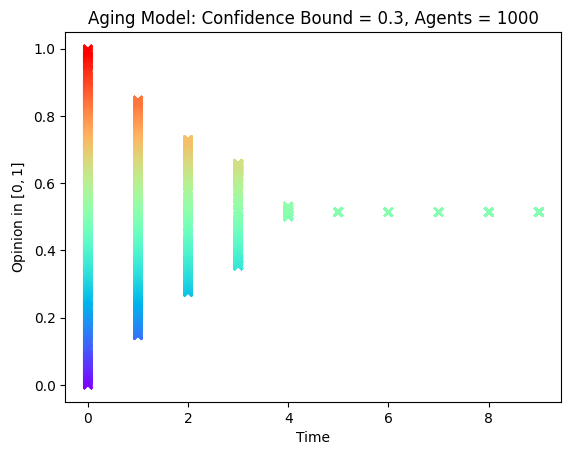

array([[2.64020437e-04, 6.55420229e-04, 1.77645169e-03, ...,
        9.96779758e-01, 9.97634612e-01, 9.98979080e-01],
       [1.47356248e-01, 1.47882816e-01, 1.48409487e-01, ...,
        8.46159504e-01, 8.46159504e-01, 8.46608885e-01],
       [2.76153776e-01, 2.76546534e-01, 2.76546534e-01, ...,
        7.28459499e-01, 7.28459499e-01, 7.28459499e-01],
       ...,
       [5.14086322e-01, 5.14086322e-01, 5.14086322e-01, ...,
        5.14086322e-01, 5.14086322e-01, 5.14086322e-01],
       [5.14086322e-01, 5.14086322e-01, 5.14086322e-01, ...,
        5.14086322e-01, 5.14086322e-01, 5.14086322e-01],
       [5.14086322e-01, 5.14086322e-01, 5.14086322e-01, ...,
        5.14086322e-01, 5.14086322e-01, 5.14086322e-01]], shape=(10, 1000))

In [ ]:
# Initialise parameters:
num_of_agents = 1000 # number of agents
Timesteps = 10 # timesteps
R = 0.3 # confidence bound

opinions = np.random.rand(num_of_agents) # init all agents to [0,1]




# Running model

# Sort opinions (only for nicer plotting - omit this step in future models)
opinions.sort()

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions

## Iterate model over time
for t in range(Timesteps-1):
    opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:],R)



# Plotting results
colours = plt.cm.rainbow(np.linspace(0,1,num_of_agents))

for i in range(num_of_agents):
    plt.plot(opinions_over_time[:,i],color=colours[i])
plt.title(f'Initial Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Time')
plt.ylabel('Opinion in $[0,1]$')
plt.show()


colours = plt.cm.rainbow(np.linspace(0,1,num_of_agents))
plt.scatter(np.array([range(Timesteps)]*num_of_agents).T, opinions_over_time, c=opinions_over_time, cmap='rainbow', marker='x')
plt.title(f'Aging Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Time')
plt.ylabel('Opinion in $[0,1]$')
plt.show()

opinions_over_time

## Experiment: how does R value affect number of clusters?

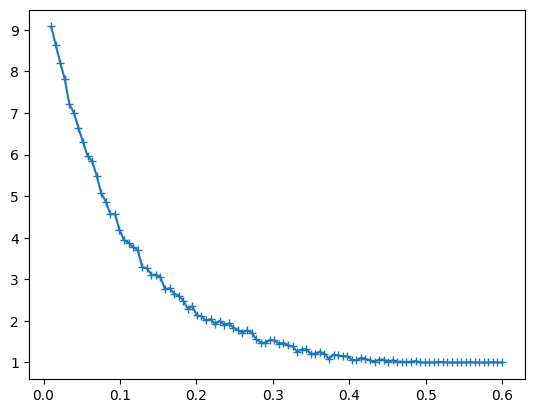

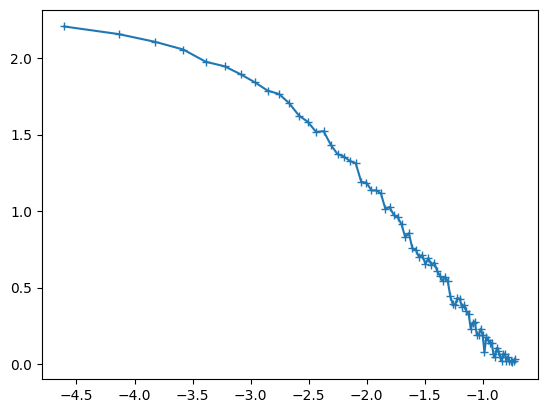

In [56]:
## Paramters
num_agents = 10
Timesteps = 10

## List of R values to test
R_list = np.linspace(0.01,0.6,100)#[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

## Number of repeats per R value
num_repeats = 100

## Initialise cluster count storage arrays
cluster_counts = np.zeros((len(R_list), num_repeats))


## Run experiment
for i, R in enumerate(R_list):
    for repeat in range(num_repeats):

        ## Setting up initial opinions
        opinions = np.random.rand(num_agents)
        opinions_over_time = np.zeros((Timesteps, num_agents))
        opinions_over_time[0,:] = opinions

        ## Iterate model over time
        for t in range(Timesteps-1):
            opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:],R)
        
        ## Count number of clusters
        cluster_counts[i,repeat] = np.unique(opinions_over_time[-1,:], return_counts=False).shape[0]

average_clusters = np.mean(cluster_counts, axis=1)

# print(cluster_counts)
# print(average_clusters)
plt.plot(R_list, average_clusters, marker='+')
plt.show()


first_1 = np.argmax(average_clusters < 1.01) ## first index of R list where average clusters ~1
plt.plot(np.log(R_list[0:first_1]), np.log(average_clusters[0:first_1]), marker='+')
plt.show()
